In [2]:
import pandas as pd
import numpy as np

#### Исследуем каждый датафрейм по отдельности

In [19]:
# Так как файл train весит > 5 ГБ, оптимизируем типы данных в таблице уменьшения
# времени работы кода c помощью библиотеки numpy
dtypes = {
    'row_id': np.int64,
    'timestamp': np.int64,
    'user_id': np.int32,
    'content_id': np.int16,
    'content_type_id': np.int8,
    'task_container_id': np.int16,
    'user_answer': np.int8,
    'answered_correctly': np.int8,
    'prior_question_elapsed_time': np.float32,
    'prior_question_had_explanation': pd.BooleanDtype
}

In [4]:
# Загрузим файл train
train = pd.read_csv('./data/train.csv', dtype=dtypes)

/var/folders/qq/pg3988tx16l8p2zf8nt6tfcc0000gq/T/ipykernel_19295/332519676.py:2: UserWarning: Instantiating BooleanDtype without any arguments.Pass a BooleanDtype instance to silence this warning.
  train = pd.read_csv('./data/train.csv', dtype=dtypes)
/var/folders/qq/pg3988tx16l8p2zf8nt6tfcc0000gq/T/ipykernel_19295/332519676.py:2: UserWarning: Instantiating BooleanDtype without any arguments.Pass a BooleanDtype instance to silence this warning.
  train = pd.read_csv('./data/train.csv', dtype=dtypes)


Описание таблицы train:
- row_id: (int64) Код идентификатора строки.

- timestamp: (int64) Время в миллисекундах между взаимодействием пользователя и завершением первого события от этого пользователя.

- user_id: (int32) Код идентификатора пользователя.

- content_id: (int16) Код идентификатора взаимодействия пользователя.

- content_type_id: (int8) 0, если событие было вопросом, адресованным пользователю, 1, если событием было то, что пользователь смотрел лекцию.

- task_container_id: (int16) Код идентификатора блока вопросов или лекций. Например, пользователь может увидеть три вопроса подряд перед тем, как увидеть объяснения к любому из них. Эти три будут иметь общий task_container_id.

- user_answer: (int8) Ответ пользователя на вопрос, если таковой имеется. Считать -1 как пустое значение, для лекций.

- answered_correctly: (int8) Если пользователь ответил правильно. Считать -1 как пустое значение, для лекций.

- prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем наборе вопросов, игнорируя любые лекции между ними. Значение равно нулю для первой группы вопросов или лекции пользователя. Обратите внимание, что время является средним временем, которое потребовалось пользователю для решения каждого вопроса в предыдущем наборе.

- prior_question_had_explanation: (bool) Был ли у пользователя просмотр объяснений и правильных ответов после ответа на предыдущий набор вопросов, игнорируя любые лекции между ними. Значение применяется ко всему набору вопросов и равно нулю для первой группы вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, являются частью диагностического теста для ознакомления, где он не получает никакой обратной связи.

In [5]:
# выведем первые 5 записей датасета
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [6]:
# посмотрим общую информацию о таблице
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.1 GB


In [8]:
# рассмотрим структуру датасета
train.shape

(101230332, 10)

In [9]:
# рассмотрим статистические показатели датасета
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542384e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [10]:
# создадим датасет-копию для дальнейшей работы
train_copy = train.copy()


In [12]:
# проверим датасет на наличие дубликатов
train_copy[train_copy.duplicated()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation


In [13]:
# проверим датасет на наличие null-значений
train_copy.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

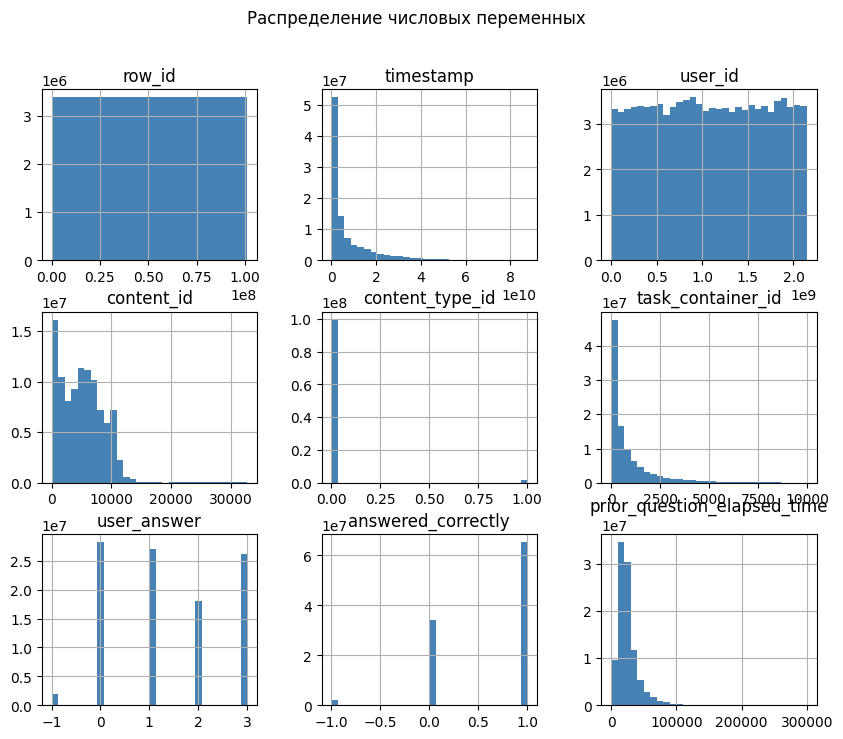

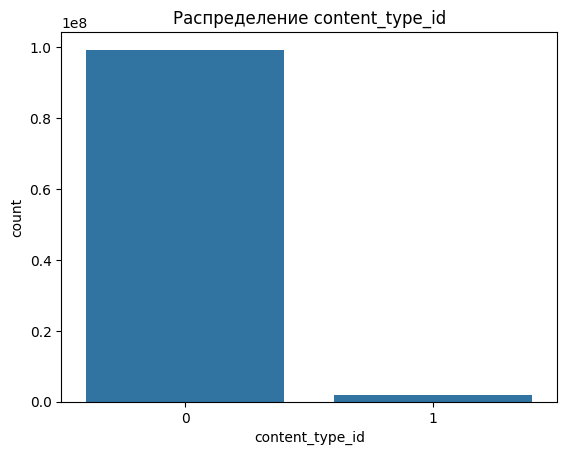

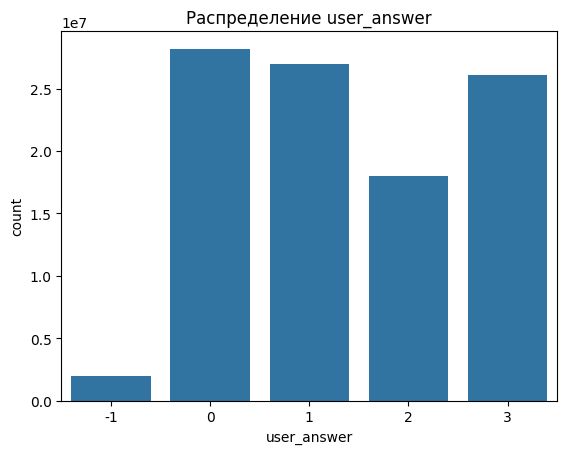

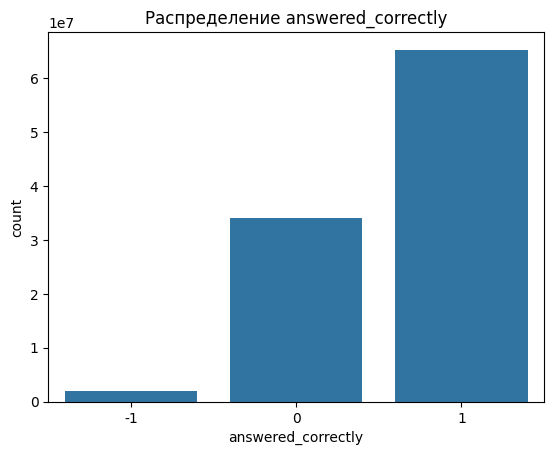

In [14]:
# проанализируем распределение каждой переменной (как числовой, так и категориальной)
# Распределение числовых переменных
import seaborn as sns
import matplotlib.pyplot as plt

train_copy.hist(bins=30, figsize=(10, 8), color='steelblue')
plt.suptitle('Распределение числовых переменных')
plt.show()

# Распределение категориальных переменных
for column in ['content_type_id', 'user_answer', 'answered_correctly']:
    sns.countplot(x=column, data=train_copy)
    plt.title(f'Распределение {column}')
    plt.show()

Как видно из графиков, в данных присутствуют не только информация по ответам на вопросы, но и просмотр лекций студентом (например, в content_type_id присутствует id=1, answered_correctly = -1,
user_answer =-1), но таких записей, очевидно, меньшинство. Как целевую переменную будем рассматривать answered_correctly, так как для ИИ модели это один из главных критериев для построения персонализированной поддержки обучения студента

In [17]:
# Загрузим данные по датафрейму lectures
lectures = pd.read_csv('./data/lectures.csv')

Структура таблицы lectures:
- lecture_id: внешний ключ для столбца train/test content_id, когда тип контента – лекция (1).

- part: код верхнего уровня категории для лекции.

- tag: один код тега для лекции. Значение тегов предоставляться не будет, но эти коды достаточны для группировки лекций вместе.

- type_of: краткое описание основной цели лекции.

In [20]:
# Выведем первые 5 записей датасета
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [37]:
# Форма таблицы 
lectures.shape

(418, 4)

In [22]:
# Проверка на дубликаты
lectures[lectures.duplicated()]

,lecture_id,tag,part,type_of


In [23]:
# Проверка на пустые значения
lectures.isnull().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

<Axes: xlabel='part'>

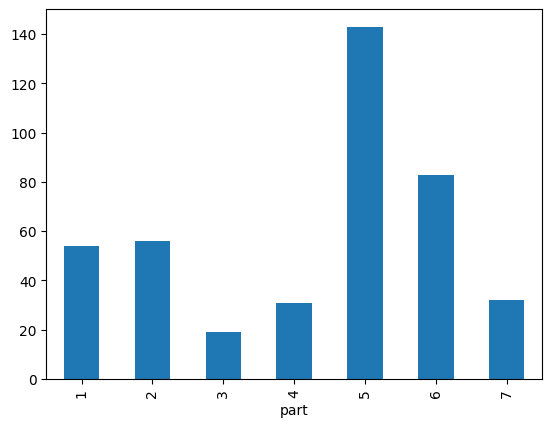

In [65]:
# выведем категории лекций 
lectures['part'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='type_of'>

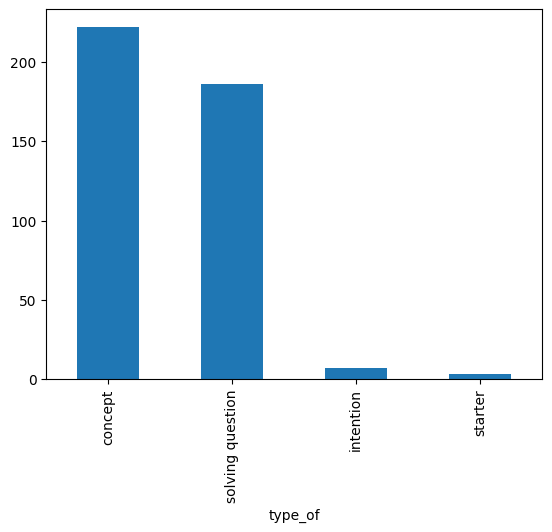

In [24]:
# Посмотрим типы лекций (type_of)
lectures['type_of'].value_counts().plot(kind='bar')

In [40]:
# Загрузим данные по датафрейму questions
questions = pd.read_csv('./data/questions.csv')

Структура таблицы questions:
- question_id: внешний ключ для столбца train/test content_id, когда тип контента – вопрос (0).

- bundle_id: код для вопросов, которые подаются вместе.

- correct_answer: ответ на вопрос. Его можно сравнить с колонной train user_answer, чтобы проверить, был ли прав пользователь.

- part: соответствующий раздел теста TOEIC.

- tags: один или несколько подробных кодов тегов для вопроса. Значение тегов предоставляться не будет, но эти коды достаточны для группировки вопросов вместе.

In [41]:
# Пять первых записей таблицы
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [42]:
# Форма таблицы
questions.shape

(13523, 5)

In [28]:
# Дубликаты
questions[questions.duplicated()]

,question_id,bundle_id,correct_answer,part,tags


In [44]:
# Наличие null
questions.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [45]:
# объединим таблицы train и lectures
data_lectures = pd.merge(
    left=train_copy, right=lectures, 
    left_on="content_id", right_on="lecture_id",
)

# Дропнем ключ так как он больше не нужен
# data_lectures = data_lectures.drop(["lecture_id"], axis=1)

# Проверим результат
display(data_lectures.head())

print(data_lectures.shape)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,18,437272,115,7926,0,18,1,1,18000.0,False,7926,57,5,concept
1,23,557677,115,185,0,23,3,0,21000.0,False,185,45,6,concept
2,30,710402,115,100,0,30,0,1,20000.0,False,100,70,1,concept
3,89,653762,2746,6808,1,14,-1,-1,NaN,False,6808,129,2,intention
4,95,835457,2746,484,0,19,0,1,20000.0,True,484,179,5,concept


(3262751, 14)


In [46]:
# Теперь объединим таблицу выше с questiones
data_question = pd.merge(
    left=train_copy, right=questions, 
    left_on="content_id", right_on="question_id",
)

# Дропнем ключ так как он больше не нужен
# data_question = data_question.drop(["question_id"], axis=1)

# Проверим результат
display(data_question.head())
print(data_question.shape)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,<NA>,5692,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92


(100038525, 15)


In [48]:
# Создадим объединенный денормализованный датасет processed_data
merged_data = pd.concat([data_question, data_lectures])
display(merged_data)
print(merged_data.shape)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags,lecture_id,tag,type_of
0,0,0,115,5692,0,1,3,1,NaN,<NA>,5692.0,5692.0,3.0,5,151,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,5716.0,2.0,5,168,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,128.0,0.0,1,131 149 92,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,7860.0,0.0,1,131 104 81,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922.0,7922.0,1.0,1,131 149 92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262746,101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False,NaN,NaN,NaN,2,NaN,6808.0,129.0,intention
3262747,101230220,1240470616,2147482216,27699,1,195,-1,-1,NaN,False,NaN,NaN,NaN,2,NaN,27699.0,129.0,intention
3262748,101230222,1240524060,2147482216,5752,1,197,-1,-1,NaN,False,NaN,NaN,NaN,2,NaN,5752.0,6.0,intention
3262749,101230265,1416460250,2147482216,5120,0,240,0,1,17000.0,True,NaN,NaN,NaN,5,NaN,5120.0,177.0,solving question


(103301276, 18)


In [49]:
# Посмотрим кол-во уникальных пользователей
print(f"Количество уникальных пользователей: \
    {merged_data['user_id'].nunique()}")

Количество уникальных пользователей:     393656


Исходя из визуализаций таблицы train, целевой переменной будет служить колонка answered_correctly. Мы видим значение -1,
что означает отсутствие ответа на лекционном материале - уберем это значение

In [52]:
# Отфильтруем таблицу
data = merged_data[merged_data["answered_correctly"] != -1]

In [67]:
data['co'].isnull().sum()

row_id                                   0
timestamp                                0
user_id                                  0
content_id                               0
content_type_id                          0
task_container_id                        0
user_answer                              0
answered_correctly                       0
prior_question_elapsed_time         395122
prior_question_had_explanation      395122
question_id                        1303719
bundle_id                          1303719
correct_answer                     1303719
part                                     0
lecture_id                        99271300
tag                               99271300
type_of                           99271300
dtype: int64

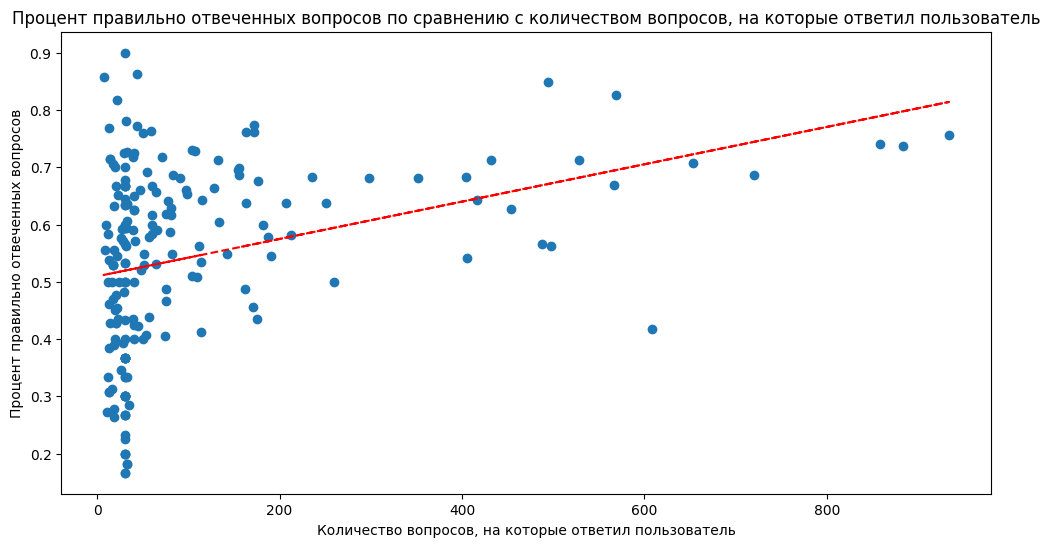

In [60]:
# Посмотрим скаттер с трендом
user_percent = data.groupby("user_id")["answered_correctly"].agg(
    Mean="mean", Answers="count"
)

user_percent = user_percent.query("Answers <= 1000").sample(n=200, random_state=1)

fig = plt.figure(figsize=(12, 6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker="o")
plt.title(
    "Процент правильно отвеченных вопросов по сравнению с количеством вопросов, на которые ответил пользователь"
)
plt.xticks(rotation=0)
plt.xlabel("Количество вопросов, на которые ответил пользователь")
plt.ylabel("Процент правильно отвеченных вопросов")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

В целом можно отметить положительную связь между колличеством правильных ответов и общим колличеством ответов данных пользователем

prior_question_had_explanation
False     9274815
True     90905082
Name: (answered_correctly, count), dtype: int64


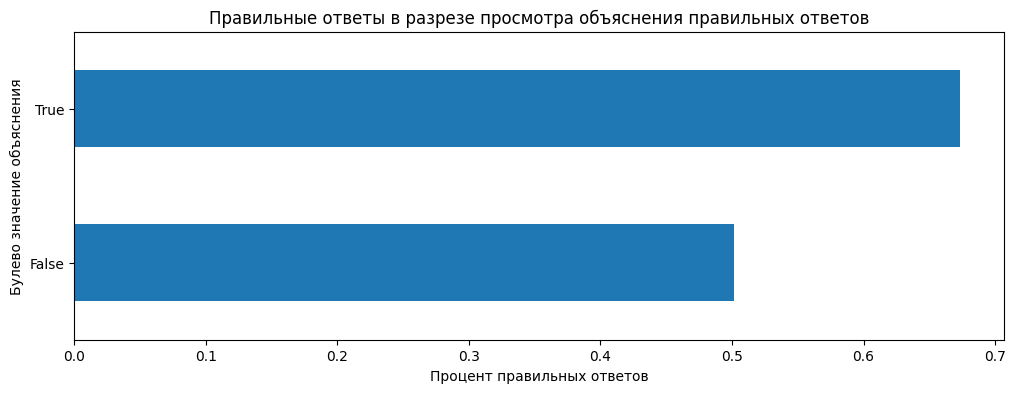

In [68]:
# Посмотрим на prior_question_had_explanation
pq = data.groupby(["prior_question_had_explanation"], dropna=True).agg(
    {"answered_correctly": ["mean", "count"]}
)

print(pq.iloc[:, 1])
pq = pq.iloc[:, 0]

fig = plt.figure(figsize=(12, 4))
pq.plot.barh()

plt.title("Правильные ответы в разрезе просмотра объяснения правильных ответов")
plt.xlabel("Процент правильных ответов")
plt.ylabel("Булево значение объяснения")
plt.xticks(rotation=0)
plt.show()

Видно, что при предварительном объяснении процент правильных ответов увеличивается

Итог по EDA:
Исследовали датафреймы, нашли зависимость между колличеством правильных ответов и общим колличеством ответов данных пользователем, а также выяснили, что при предварительном объяснении задания стуцендам процент правильных ответов увеличивается